In [1]:
import pandas as pd 
import numpy as np 

from itertools import permutations
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# open and read the raw file

file = open("W02_data_groceries.csv")
s = file.read()
s

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npotted plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogu

In [3]:
# Check the baskets 

baskets = s.split("\n")
baskets = [x.split(",") for x in baskets]
baskets 

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [4]:
# Data cleaning and sorting 

SKUs = s.replace("\n",",")
SKUs = SKUs.split(",")
SKUs = list(set(SKUs))
SKUs.remove("")
len(SKUs)
SKUs.sort()

In [5]:
SKUs

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [6]:
# 𝐒𝐮𝐩𝐩𝐨𝐫𝐭𝑿→𝒀 measures the absolute appearanceof 𝑿 and 𝒀 together. 
# Can be misleading, e.g. if 𝑿 and 𝒀 are both fast moving items
# Support of single items e.g. cereals 

item = "cereals"
item_count = 0
for x in baskets:
    if item in x:
        item_count += 1
print("Support for {0:}: {1:.2f}".format(item,item_count/len(baskets)))

Support for cereals: 0.01


In [7]:
# Support of all items 

item_counts = {}

for basket in baskets:
    for item in basket:
        if item:
            if item in item_counts:
                item_counts[item] += 1
            else:
                item_counts[item] = 1
            
item_counts

{'citrus fruit': 814,
 'semi-finished bread': 174,
 'margarine': 576,
 'ready soups': 18,
 'tropical fruit': 1032,
 'yogurt': 1372,
 'coffee': 571,
 'whole milk': 2513,
 'pip fruit': 744,
 'cream cheese': 390,
 'meat spreads': 42,
 'other vegetables': 1903,
 'condensed milk': 101,
 'long life bakery product': 368,
 'butter': 545,
 'rice': 75,
 'abrasive cleaner': 35,
 'rolls/buns': 1809,
 'UHT-milk': 329,
 'bottled beer': 792,
 'liquor (appetizer)': 78,
 'potted plants': 170,
 'cereals': 56,
 'white bread': 414,
 'bottled water': 1087,
 'chocolate': 488,
 'curd': 524,
 'flour': 171,
 'dishes': 173,
 'beef': 516,
 'frankfurter': 580,
 'soda': 1715,
 'chicken': 422,
 'sugar': 333,
 'fruit/vegetable juice': 711,
 'newspapers': 785,
 'packaged fruit/vegetables': 128,
 'specialty bar': 269,
 'butter milk': 275,
 'pastry': 875,
 'processed cheese': 163,
 'detergent': 189,
 'root vegetables': 1072,
 'frozen dessert': 106,
 'sweet spreads': 89,
 'salty snack': 372,
 'waffles': 378,
 'candy': 2

In [8]:
len(item_counts)

169

In [9]:
# 𝐂𝐨𝐧𝐟𝐢𝐝𝐞𝐧𝐜𝐞 overcomes this shortcoming and provides a more complete picture
# 𝐋𝐢𝐟𝐭 and 𝐋𝐞𝐯𝐞𝐫𝐚𝐠𝐞 compare the actual share of 𝑿&𝒀 with the expected share.
# 𝐋𝐢𝐟𝐭 > 𝟏 or 𝐋𝐞𝐯𝐞𝐫𝐚𝐠𝐞 > 𝟎 means positive correlation. 
# 𝐋𝐢𝐟𝐭 < 𝟏 or 𝐋𝐞𝐯𝐞𝐫𝐚𝐠𝐞 < 𝟎 means negative correlation. It holds −𝟏 < 𝐋𝐞𝐯𝐞𝐫𝐚𝐠𝐞 < 𝟏

In [10]:
# Support, lift and leverage for item combinations e.g. cereals and whole milk 

item1 = "cereals"
item2 = "whole milk"
item1_count = 0
item2_count = 0
item_combi_count = 0
count_baskets = len(baskets)
for x in baskets:
    if item1 in x:
        item1_count += 1
        if item2 in x:
            item_combi_count += 1
    if item2 in x:
        item2_count += 1
support = item_combi_count/count_baskets
lift = item_combi_count / item1_count/ item2_count * count_baskets
leverage = item_combi_count / count_baskets - item1_count * item2_count / count_baskets**2
print("KPIs for combination " + item1 + "/" + item2 + ":")
print("Support: {0:.3f}".format(support))
print("Lift: {0:.3f}".format(lift))
print("Leverage: {0:.3f}".format(leverage))

KPIs for combination cereals/whole milk:
Support: 0.004
Lift: 2.516
Leverage: 0.002


In [11]:
shelf1 = ['shopping bags','newspapers','long life bakery product','cling film/bags','flower (seeds)','pet care','photo/film','candles','dog food','rice','instant coffee','kitchen towels','light bulbs','preservation products','sound storage medium']
shelf2 = ['soda','bottled water','bottled beer','canned beer','fruit/vegetable juice','red/blush wine','white wine','liquor','sparkling wine','rum','brandy','cocoa drinks','prosecco','liqueur','whisky']
shelf3 = ['rolls/buns','sausage','pastry','brown bread','frankfurter','pork','beef','white bread','waffles','hamburger meat','zwieback','cereals','syrup','fish','honey']
shelf4 = ['napkins','hygiene articles','softener','cleaner','male cosmetics','abrasive cleaner','skin care','bathroom cleaner','decalcifier','hair spray','make up remover','toilet cleaner','baby cosmetics','kitchen utensil','baby food']
shelf5 = ['chocolate','salty snack','specialty chocolate','candy','specialty bar','chewing gum','cake bar','chocolate marshmallow','popcorn','nuts/prunes','artif. sweetener','snack products','cookware','cooking chocolate','pudding powder']
shelf6 = ['other vegetables','root vegetables','tropical fruit','citrus fruit','pip fruit','sauces','spices','ketchup','tea','canned fruit','potato products','organic sausage','ready soups','specialty vegetables','salad dressing']
shelf7 = ['whole milk','yogurt','butter','curd','frozen meals','spread cheese','frozen dessert','condensed milk','specialty cheese','frozen potato products','finished products','curd cheese','cream','frozen fruits','frozen chicken']
shelves = [shelf1, shelf2, shelf3, shelf4, shelf5, shelf6, shelf7]

In [12]:
# get the 64 new items 

new_shelves = np.array(shelves)
new_shelves = new_shelves.flatten()
new_skus = np.array(SKUs)

# Create true false lookup table 

lookup_table = np.isin(np.array(SKUs), new_shelves, invert=True)

# add new items 

new_items = new_skus[lookup_table]

print(new_items)
print(type(new_items))
print(len(new_items))

['Instant food products' 'UHT-milk' 'bags' 'baking powder' 'berries'
 'beverages' 'butter milk' 'canned fish' 'canned vegetables' 'cat food'
 'chicken' 'coffee' 'cream cheese' 'dental care' 'dessert' 'detergent'
 'dish cleaner' 'dishes' 'domestic eggs' 'female sanitary products'
 'flour' 'flower soil/fertilizer' 'frozen fish' 'frozen vegetables'
 'grapes' 'ham' 'hard cheese' 'herbs' 'house keeping products' 'ice cream'
 'jam' 'liquor (appetizer)' 'liver loaf' 'margarine' 'mayonnaise' 'meat'
 'meat spreads' 'misc. beverages' 'mustard' 'nut snack' 'oil' 'onions'
 'organic products' 'packaged fruit/vegetables' 'pasta'
 'pickled vegetables' 'potted plants' 'processed cheese' 'roll products'
 'rubbing alcohol' 'salt' 'seasonal products' 'semi-finished bread'
 'sliced cheese' 'soap' 'soft cheese' 'soups' 'specialty fat' 'sugar'
 'sweet spreads' 'tidbits' 'turkey' 'vinegar' 'whipped/sour cream']
<class 'numpy.ndarray'>
64


In [13]:
# store the baskets in a new variables called transactions 

transactions = baskets
transactions 

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [14]:
# Define the set of groceries

flattened = [i for t in transactions for i in t]
groceries = list(set(flattened))
len(groceries)

170

In [15]:
# Delete all empty strings in the list 

while '' in groceries:
    groceries.remove('')

groceries

['syrup',
 'bathroom cleaner',
 'liquor',
 'house keeping products',
 'frozen vegetables',
 'cling film/bags',
 'candy',
 'cereals',
 'nuts/prunes',
 'white bread',
 'male cosmetics',
 'chewing gum',
 'skin care',
 'other vegetables',
 'pork',
 'specialty fat',
 'tropical fruit',
 'decalcifier',
 'dessert',
 'hair spray',
 'fruit/vegetable juice',
 'brown bread',
 'pasta',
 'frozen meals',
 'pickled vegetables',
 'condensed milk',
 'frankfurter',
 'soups',
 'specialty bar',
 'butter',
 'bottled water',
 'waffles',
 'whisky',
 'honey',
 'sparkling wine',
 'ketchup',
 'specialty chocolate',
 'pudding powder',
 'dog food',
 'chocolate',
 'napkins',
 'red/blush wine',
 'bags',
 'cooking chocolate',
 'semi-finished bread',
 'meat',
 'jam',
 'sound storage medium',
 'vinegar',
 'popcorn',
 'flower soil/fertilizer',
 'hamburger meat',
 'roll products',
 'dish cleaner',
 'artif. sweetener',
 'yogurt',
 'white wine',
 'photo/film',
 'root vegetables',
 'onions',
 'soft cheese',
 'liqueur',
 'sa

In [16]:
# Preprocessing steps to use the apriopri algorithm 

# Generate all possible rules

rules = list(permutations(groceries, 2))
rules 

[('syrup', 'bathroom cleaner'),
 ('syrup', 'liquor'),
 ('syrup', 'house keeping products'),
 ('syrup', 'frozen vegetables'),
 ('syrup', 'cling film/bags'),
 ('syrup', 'candy'),
 ('syrup', 'cereals'),
 ('syrup', 'nuts/prunes'),
 ('syrup', 'white bread'),
 ('syrup', 'male cosmetics'),
 ('syrup', 'chewing gum'),
 ('syrup', 'skin care'),
 ('syrup', 'other vegetables'),
 ('syrup', 'pork'),
 ('syrup', 'specialty fat'),
 ('syrup', 'tropical fruit'),
 ('syrup', 'decalcifier'),
 ('syrup', 'dessert'),
 ('syrup', 'hair spray'),
 ('syrup', 'fruit/vegetable juice'),
 ('syrup', 'brown bread'),
 ('syrup', 'pasta'),
 ('syrup', 'frozen meals'),
 ('syrup', 'pickled vegetables'),
 ('syrup', 'condensed milk'),
 ('syrup', 'frankfurter'),
 ('syrup', 'soups'),
 ('syrup', 'specialty bar'),
 ('syrup', 'butter'),
 ('syrup', 'bottled water'),
 ('syrup', 'waffles'),
 ('syrup', 'whisky'),
 ('syrup', 'honey'),
 ('syrup', 'sparkling wine'),
 ('syrup', 'ketchup'),
 ('syrup', 'specialty chocolate'),
 ('syrup', 'puddin

In [17]:
# Print the number of rules

print(len(rules))

28392


In [18]:
# Instantiate transaction encoder and identify unique items

encoder = TransactionEncoder().fit(transactions)
encoder

TransactionEncoder()

In [19]:
# One-hot encode transactions
# one-hot encoded DataFrame, where each column consists of TRUE and FALSE values 
# that indicate whether an item was included in a transaction.

onehot = encoder.transform(transactions)
onehot

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [20]:
# Convert one-hot encoded data to DataFrame

onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

,,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
# Compute the support and print it 
# 𝐒𝐮𝐩𝐩𝐨𝐫𝐭𝑿→𝒀 measurestheabsoluteappearanceof 𝑿 and 𝒀 together. 
# Can be misleading, e.g. if 𝑿 and 𝒀 are both fast moving items

support = onehot.mean()
print(support)

                         0.000102
Instant food products    0.008032
UHT-milk                 0.033449
abrasive cleaner         0.003558
artif. sweetener         0.003253
                           ...   
white bread              0.042090
white wine               0.019012
whole milk               0.255490
yogurt                   0.139488
zwieback                 0.006913
Length: 170, dtype: float64


In [22]:
# Compute support for whole milk and cereals
supportWC = np.logical_and(onehot['whole milk'], onehot['cereals']).mean()

# Compute support for whole milk and yogurt
supportWY = np.logical_and(onehot['whole milk'], onehot['yogurt']).mean()

# Compute support for cereals and yogurt
supportCY = np.logical_and(onehot['cereals'], onehot['yogurt']).mean()

# Print support values
print("Support whole milk and cereals: %.2f" % supportWC)
print("Support for whole milk and yogurt: %.2f" % supportWY)
print("support for cereals and yogurt: %.2f" % supportCY)

Support whole milk and cereals: 0.00
Support for whole milk and yogurt: 0.06
support for cereals and yogurt: 0.00


In [23]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.006, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
print(frequent_itemsets.head(10))

    support                 itemsets
0  0.008032  (Instant food products)
1  0.033449               (UHT-milk)
2  0.017690          (baking powder)
3  0.052460                   (beef)
4  0.033245                (berries)
5  0.026027              (beverages)
6  0.080521           (bottled beer)
7  0.110512          (bottled water)
8  0.064864            (brown bread)
9  0.055409                 (butter)


In [24]:
# Compute frequent itemsets using a support of 0.003 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.003, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.001 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.001, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))


#  Create a DataFRame for e.g. frequent itemsets 1 and print it 
frequent_itemsets_1_df = pd.DataFrame(frequent_itemsets_1)
frequent_itemsets_1_df.head(10)

2126 9969


,support,itemsets
0,0.008032,(Instant food products)
1,0.033449,(UHT-milk)
2,0.003558,(abrasive cleaner)
3,0.003253,(artif. sweetener)
4,0.017690,(baking powder)
5,0.052460,(beef)
6,0.033245,(berries)
7,0.026027,(beverages)
8,0.080521,(bottled beer)
9,0.110512,(bottled water)


In [25]:
# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                         	min_threshold = 0.0015)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = 'support', 
                        	min_threshold = 0.0015)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

7380 24748


In [26]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                         	min_threshold = 1.0)


# create a df with the association rules 

rules_df = pd.DataFrame(rules)
rules_df.shape

(5428, 9)

In [27]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                         	min_threshold = 1.0)

# create a df with the association rules 

rules_df = pd.DataFrame(rules)
rules_df.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(bottled water),0.008032,0.110512,0.001017,0.126582,1.145412,0.000129,1.018399
1,(bottled water),(Instant food products),0.110512,0.008032,0.001017,0.009200,1.145412,0.000129,1.001179
2,(Instant food products),(butter),0.008032,0.055409,0.001220,0.151899,2.741424,0.000775,1.113772
3,(butter),(Instant food products),0.055409,0.008032,0.001220,0.022018,2.741424,0.000775,1.014302
4,(citrus fruit),(Instant food products),0.082757,0.008032,0.001118,0.013514,1.682518,0.000454,1.005557
5,(Instant food products),(citrus fruit),0.008032,0.082757,0.001118,0.139241,1.682518,0.000454,1.065620
6,(curd),(Instant food products),0.053274,0.008032,0.001322,0.024809,3.088897,0.000894,1.017204
7,(Instant food products),(curd),0.008032,0.053274,0.001322,0.164557,3.088897,0.000894,1.133203
8,(domestic eggs),(Instant food products),0.063440,0.008032,0.001017,0.016026,1.995294,0.000507,1.008124
9,(Instant food products),(domestic eggs),0.008032,0.063440,0.001017,0.126582,1.995294,0.000507,1.072293


In [28]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.0015, 
                            max_len = 2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                         	min_threshold = 0.5)

# Print association rules
print(rules)

          antecedents         consequents  antecedent support  \
0     (baking powder)        (whole milk)            0.017690   
1           (cereals)        (whole milk)            0.005693   
2               (jam)        (whole milk)            0.005388   
3              (rice)  (other vegetables)            0.007625   
4  (specialty cheese)  (other vegetables)            0.008540   
5              (rice)        (whole milk)            0.007625   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.255490  0.009252    0.522989  2.047002  0.004732    1.560780  
1            0.255490  0.003660    0.642857  2.516173  0.002205    2.084628  
2            0.255490  0.002948    0.547170  2.141648  0.001572    1.644126  
3            0.193473  0.003965    0.520000  2.687714  0.002490    1.680265  
4            0.193473  0.004270    0.500000  2.584341  0.002618    1.613054  
5            0.255490  0.004677    0.613333  2.400615  0.002729    1.925457 

(array([0.5, 1.5]),
 [Text(0, 0.5, 'other vegetables'), Text(0, 1.5, 'whole milk')])

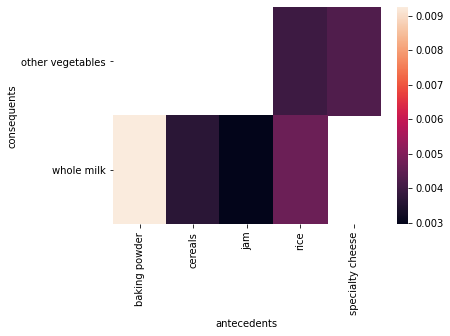

In [29]:
# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)

# Format and display plot
plt.yticks(rotation=0)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'baking powder'),
  Text(1.5, 0, 'cereals'),
  Text(2.5, 0, 'jam'),
  Text(3.5, 0, 'rice'),
  Text(4.5, 0, 'specialty cheese')])

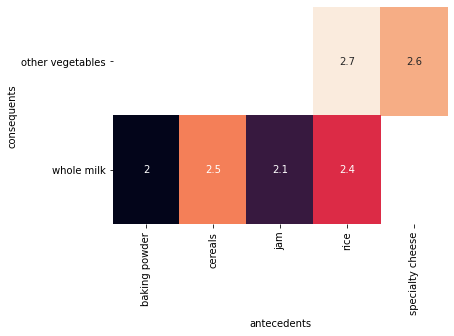

In [30]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='support', ylabel='confidence'>

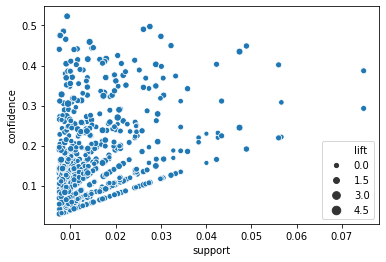

In [31]:
# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                         use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = "support", 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)

In [32]:
# Create DataFrame with the 105 items 

df = pd.DataFrame({'shelf_1': shelf1, 'shelf_2': shelf2, 'shelf_3': shelf3, 'shelf_4': shelf4, 
                   'shelf_5': shelf5, 'shelf_6': shelf6, 'shelf7': shelf7})

df.head(15)

,shelf_1,shelf_2,shelf_3,shelf_4,shelf_5,shelf_6,shelf7
0,shopping bags,soda,rolls/buns,napkins,chocolate,other vegetables,whole milk
1,newspapers,bottled water,sausage,hygiene articles,salty snack,root vegetables,yogurt
2,long life bakery product,bottled beer,pastry,softener,specialty chocolate,tropical fruit,butter
3,cling film/bags,canned beer,brown bread,cleaner,candy,citrus fruit,curd
4,flower (seeds),fruit/vegetable juice,frankfurter,male cosmetics,specialty bar,pip fruit,frozen meals
5,pet care,red/blush wine,pork,abrasive cleaner,chewing gum,sauces,spread cheese
6,photo/film,white wine,beef,skin care,cake bar,spices,frozen dessert
7,candles,liquor,white bread,bathroom cleaner,chocolate marshmallow,ketchup,condensed milk
8,dog food,sparkling wine,waffles,decalcifier,popcorn,tea,specialty cheese
9,rice,rum,hamburger meat,hair spray,nuts/prunes,canned fruit,frozen potato products


In [33]:
# Check the new items 

new_items

array(['Instant food products', 'UHT-milk', 'bags', 'baking powder',
       'berries', 'beverages', 'butter milk', 'canned fish',
       'canned vegetables', 'cat food', 'chicken', 'coffee',
       'cream cheese', 'dental care', 'dessert', 'detergent',
       'dish cleaner', 'dishes', 'domestic eggs',
       'female sanitary products', 'flour', 'flower soil/fertilizer',
       'frozen fish', 'frozen vegetables', 'grapes', 'ham', 'hard cheese',
       'herbs', 'house keeping products', 'ice cream', 'jam',
       'liquor (appetizer)', 'liver loaf', 'margarine', 'mayonnaise',
       'meat', 'meat spreads', 'misc. beverages', 'mustard', 'nut snack',
       'oil', 'onions', 'organic products', 'packaged fruit/vegetables',
       'pasta', 'pickled vegetables', 'potted plants', 'processed cheese',
       'roll products', 'rubbing alcohol', 'salt', 'seasonal products',
       'semi-finished bread', 'sliced cheese', 'soap', 'soft cheese',
       'soups', 'specialty fat', 'sugar', 'sweet spreads

In [34]:
# Create pd.Series of the new items and  Add the new items to the old items to get the total 

shelf01 = pd.Series(['bags', 'cat food', 'Instant food products'])
shelf02 = pd.Series(['rubbing alcohol', 'liquor (appetizer)'])
shelf03 = pd.Series(['jam', 'ham', 'meat', 'meat spreads', 'processed cheese', 'sliced cheese', 'processed cheese', 'sliced cheese', 'soft cheese', 'turkey', 'domestic eggs', 'mustard', 'tidbits'])
shelf04 = pd.Series(['house keeping products', 'dental care', 'beverages', 'baking powder', 'detergent', 'dish cleaner', 'dishes', 'female sanitary products',  'soap', 'vinegar'])
shelf05 = pd.Series(['berries', 'dessert', 'nut snack', 'sugar', 'sweet spreads', 'ice cream'])
shelf06 = pd.Series(['canned vegetables', 'frozen vegetables', 'packaged fruit/vegetables', 'pickled vegetables', 'flour', 'flower soil/fertilizer', 'grapes', 'herbs', 'margarine', 'mayonnaise', 'misc. beverages', 'oil', 'onions', 'salt'])
shelf07 = pd.Series(['butter milk', 'UHT-milk', 'coffee', 'whipped/sour cream'])
shelves2 = [shelf01, shelf02, shelf03, shelf04, shelf05, shelf06, shelf07]

In [35]:
# Create a DataFrame with all the items recommended

df2 = pd.DataFrame({'shelf_1': shelf01, 'shelf_2': shelf02, 'shelf_3': shelf03, 'shelf_4': shelf04, 
                   'shelf_5': shelf05, 'shelf_6': shelf06, 'shelf7': shelf07})
df2

,shelf_1,shelf_2,shelf_3,shelf_4,shelf_5,shelf_6,shelf7
0,bags,rubbing alcohol,jam,house keeping products,berries,canned vegetables,butter milk
1,cat food,liquor (appetizer),ham,dental care,dessert,frozen vegetables,UHT-milk
2,Instant food products,NaN,meat,beverages,nut snack,packaged fruit/vegetables,coffee
3,NaN,NaN,meat spreads,baking powder,sugar,pickled vegetables,whipped/sour cream
4,NaN,NaN,processed cheese,detergent,sweet spreads,flour,NaN
5,NaN,NaN,sliced cheese,dish cleaner,ice cream,flower soil/fertilizer,NaN
6,NaN,NaN,processed cheese,dishes,NaN,grapes,NaN
7,NaN,NaN,sliced cheese,female sanitary products,NaN,herbs,NaN
8,NaN,NaN,soft cheese,soap,NaN,margarine,NaN
9,NaN,NaN,turkey,vinegar,NaN,mayonnaise,NaN


In [36]:
# DataFrame with all items recommended

df_new = pd.concat([df, df2], ignore_index=True)
df_new

,shelf_1,shelf_2,shelf_3,shelf_4,shelf_5,shelf_6,shelf7
0,shopping bags,soda,rolls/buns,napkins,chocolate,other vegetables,whole milk
1,newspapers,bottled water,sausage,hygiene articles,salty snack,root vegetables,yogurt
2,long life bakery product,bottled beer,pastry,softener,specialty chocolate,tropical fruit,butter
3,cling film/bags,canned beer,brown bread,cleaner,candy,citrus fruit,curd
4,flower (seeds),fruit/vegetable juice,frankfurter,male cosmetics,specialty bar,pip fruit,frozen meals
5,pet care,red/blush wine,pork,abrasive cleaner,chewing gum,sauces,spread cheese
6,photo/film,white wine,beef,skin care,cake bar,spices,frozen dessert
7,candles,liquor,white bread,bathroom cleaner,chocolate marshmallow,ketchup,condensed milk
8,dog food,sparkling wine,waffles,decalcifier,popcorn,tea,specialty cheese
9,rice,rum,hamburger meat,hair spray,nuts/prunes,canned fruit,frozen potato products
